# |------------------------Credit Card Approval Prediction--------------------|

# Project Overview

A bank's credit card department is one of the top adopters of data science. A top focus for the bank has always been acquiring new credit card customers. Giving out credit cards without doing proper research or evaluating applicants' creditworthiness is quite risky. The credit card department has been using a data-driven system for credit assessment called Credit Scoring for many years, and the model is known as an application scorecard. A credit card application's cutoff value is determined using the application scorecard, which also aids in estimating the applicant's level of risk. This decision is made based on strategic priority at a given time.

Customers must fill out a form, either physically or online, to apply for a credit card. The application data is used to evaluate the applicant's creditworthiness. The decision is made using the application data in addition to the Credit Bureau Score, such as the FICO Score in the US or the CIBIL Score in India, and other internal information on the applicants. Additionally, the banks are rapidly taking a lot of outside data into account to enhance the caliber of credit judgements.

# Project Objective

The main objective of this assignment is to minimize the risk and maximize the profit of the bank. Bank has to make a decision based on the applicant’s profile to minimize the loss from the bank's perspective. Bank considers the applicant's over their nature of work, income range and family orientaion details to take any decision to approve or reject a credit card application. The customer Credit card data contains many features and a classification approach to identify the credit worthiness of an applicant.

In this project we are utilizing the exploratory data analysis (EDA) as a data exploration technique to acquire knowledge, discover new relations, apply new methodologies and unravel patterns in data. It is important to apply the necessary rationale behind each step to address the main objective of the study.

So,The primary objective of this project is to develop a machine learning model for Credit Card Approval Prediction.

# About Dataset:

Credit_Card.csv

| Features | Values |
| --- | --- |
|*Ind_ID*|	Client ID|
|*Approval_status*|	0 is application approved and 1 is application rejected|
|*Gender*|Gender information|
|*Car_owner*|Having car or not|
|*Propert_owner*|	Having property or not|
|*Children*|	Count of children|
|*Annual_income*|	Annual income|
|*Type_Income*|	Income type|
|*Education*|	Education level|
|*Marital_status*|	Marital_status|
|*Housing_type*|	Living style|
|*Birthday_count*|	Use backward count from current day (0), -1 means yesterday|
|*Employed_days*|	Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed|
|*Mobile_phone*|	Any mobile phone|
|*Work_phone*|	Any work phone|
|*Phone*|	Any phone number|
|*EMAIL_ID*|	Any email ID|
|*Type_Occupation*|	Occupation|
|*Family_Members*|	Family size|

Credit_card_label

| Features | Values |
| --- | --- |
|ID| The joining key between application data and credit status data, same is Ind_ID|
|Label| 0 is application approved and 1 is application rejected|

# Import Libraries for Data Exploration and Data Preprocessing:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
#For Handling Imbalances Data:
from imblearn.over_sampling import SMOTE
#Spliting Data into Train and Test:
from sklearn.model_selection import train_test_split
#For Feature Scaling:
from sklearn.preprocessing import StandardScaler
#For ignoring  warnings:
import warnings
warnings.filterwarnings('ignore')

# Import Datasets

In [3]:
from google.colab import files


uploaded = files.upload()


Saving Credit_card_label.csv to Credit_card_label.csv
Saving Credit_card.csv to Credit_card.csv


In [4]:
Credit_card = pd.read_csv('Credit_card.csv')
Credit_card_label = pd.read_csv('Credit_card_label.csv')

# Data Exploration

In [5]:
Credit_card.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [6]:
Credit_card_label.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


# Merging Both DataFrames Using Pandas Merge Function

In [7]:
data = pd.merge(Credit_card, Credit_card_label, on='Ind_ID', how='inner')
df = data.copy()

In [8]:
df.head() #First 5 Rows of df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [9]:
df.tail() #Last 5 Rows of df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2,0


**Upon initial inspection of the dataset using the <font color=red>head()</font> and <font color=red>tail()</font> functions, it's evident that the data contains missing or null values.**

**These missing values need to be addressed effectively to ensure the reliability and accuracy of our analysis and modeling efforts.**

**we also need to create an AGE Column from 'Birthday_counts' and an 'Employed_Status' Column with 'Employed' and 'Unemployed' Categories Using 'Employed_days.**

# ***Shape of Our Dataset (Number of Rows And Number of Columns)***

In [10]:
df.shape
print("Total Number of Rows in Dataset  :",data.shape[0])
print("Total Number of Columns in Dataset:",data.shape[1])

Total Number of Rows in Dataset  : 1548
Total Number of Columns in Dataset: 19


## <font color=yellow>**Get Information About Our Dataset:**</font>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

<font color=white>**We can gather valuable information about the dataset:**</font>
   
    >The dataset contains 1,548 entries (rows).
    
    >There are 19 columns in the dataset out of these 8 columns are Categorical and 11 are Numerical Columns.
    
    >Several columns have missing values, including GENDER, Annual_income, Birthday_count, and Type_Occupation.
    
    >The dataset consumes approximately 241.9 KB of memory.

## <font color=yellow>**Categorical Columns in Dataset**</font>

In [12]:
categorical_columns = df.select_dtypes(include=['object']).columns
for i in categorical_columns:
    print(i)

GENDER
Car_Owner
Propert_Owner
Type_Income
EDUCATION
Marital_status
Housing_type
Type_Occupation


## <font color=red>**Numerical Columns in Dataset**</font>

In [13]:
numerical_columns = df.select_dtypes(include='number')
for i in numerical_columns:
    print(i)

Ind_ID
CHILDREN
Annual_income
Birthday_count
Employed_days
Mobile_phone
Work_Phone
Phone
EMAIL_ID
Family_Members
label


# Checking for missing values

In [14]:
df.isnull().sum()/len(df)*100

Ind_ID              0.000000
GENDER              0.452196
Car_Owner           0.000000
Propert_Owner       0.000000
CHILDREN            0.000000
Annual_income       1.485788
Type_Income         0.000000
EDUCATION           0.000000
Marital_status      0.000000
Housing_type        0.000000
Birthday_count      1.421189
Employed_days       0.000000
Mobile_phone        0.000000
Work_Phone          0.000000
Phone               0.000000
EMAIL_ID            0.000000
Type_Occupation    31.524548
Family_Members      0.000000
label               0.000000
dtype: float64

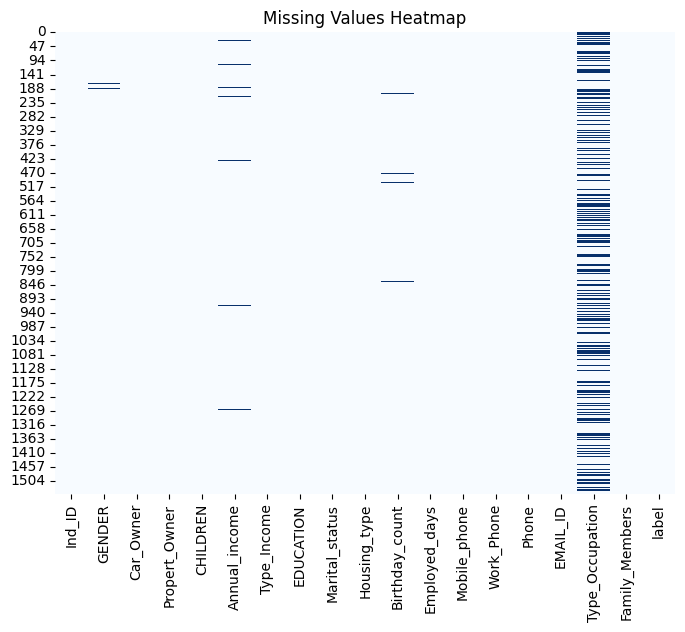

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='Blues', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

<font color=white>**Here we can see that:**</font>

GENDER: 0.45% missing values

Annual_income: 1.49% missing values

Birthday_count: 1.42% missing values

Type_Occupation: 31.52% missing values

These columns have missing values in the dataset, and addressing these missing values will be important during data preprocessing and analysis.

# <font color=orange>**Drop Irrelevant Features**</font>

In [16]:
df = df.drop(columns = ['Mobile_phone','Work_Phone','Phone','EMAIL_ID','Type_Occupation'],axis=1)

**Looking at our data, we see that 'Type_Occupation' has a lot of missing values, around 31.52%,which is why we consider removing it.**

In [17]:
df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Family_Members',
       'label'],
      dtype='object')

## Calculate the Approx Age of Customers using "Birthday_count"  variable

In [18]:
#Calculate Approx Age of Customers
Age = []
for i in df['Birthday_count']:
    if not math.isnan(i):  # Check if the value is not NaN
        a = i / 365
        Age.append(round(abs(a)))
    else:
        Age.append(np.nan)

df['Age'] = Age  # Create a new column 'Approx_Age' in your DataFrame

# Creating an "Employed_Status" Feature from "Employed_days"

In [19]:
Employed_status = []
for i in df['Employed_days']:
    if i < 0:
        Employed_status.append('Employed')
    else:
        Employed_status.append("Unemployed")
df['Employed_status'] = Employed_status

## <font color=yellow>**Delete Features Birthday_count and Employed_days**</font>

In [20]:
df = df.drop(columns=['Birthday_count','Employed_days'],axis=1)

In [21]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Family_Members,label,Age,Employed_status
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,2,1,51.0,Unemployed
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,2,1,37.0,Employed
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,2,1,NaN,Employed
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,2,1,37.0,Employed
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,2,1,37.0,Employed


**Renaming the Feature**



In [22]:
df.rename(columns={'label':'Approved_status'},inplace=True)

In [23]:
for i  in df.columns:
    print(i)

Ind_ID
GENDER
Car_Owner
Propert_Owner
CHILDREN
Annual_income
Type_Income
EDUCATION
Marital_status
Housing_type
Family_Members
Approved_status
Age
Employed_status


## **Now we have 14 features for Analysis**

# <font color=yellow>**Overall Statistics About The Dataset**</font>

In [24]:
df.describe()

,Ind_ID,CHILDREN,Annual_income,Family_Members,Approved_status,Age
count,1.548000e+03,1548.000000,1.525000e+03,1548.000000,1548.000000,1526.000000
mean,5.078920e+06,0.412791,1.913993e+05,2.161499,0.113049,43.952818
std,4.171759e+04,0.776691,1.132530e+05,0.947772,0.316755,11.603295
min,5.008827e+06,0.000000,3.375000e+04,1.000000,0.000000,21.000000
25%,5.045070e+06,0.000000,1.215000e+05,2.000000,0.000000,34.000000
50%,5.078842e+06,0.000000,1.665000e+05,2.000000,0.000000,43.000000
75%,5.115673e+06,1.000000,2.250000e+05,3.000000,0.000000,54.000000
max,5.150412e+06,14.000000,1.575000e+06,15.000000,1.000000,68.000000


**<font color=yellow>Data Summary Report</font>**


**The average annual income is approximately 191,399.30, with a notable standard deviation of 113,253.00, suggesting a wide income distribution.**

**The age of individuals ranges from 21 to 68 years, with an average age of approximately 43.95 years.**

**The dataset contains information on credit card applicants, with notable variations in annual income,family size, and the number of children.**

**However, it faces challenges such as missing data and outliers in certain features.**

**Additionally, the dataset exhibits class imbalance, with a relatively more credit card approval rate.**

<font color=orange>**To build an effective credit card approval prediction model, thorough data preprocessing, including handling missing values and outliers, as well as careful model selection and evaluation, will be essential to ensure accurate predictions**.</font>

# Check Unique Values in Categorical Columns

In [25]:
df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Family_Members', 'Approved_status', 'Age',
       'Employed_status'],
      dtype='object')

In [26]:
categorical_column = df.select_dtypes(include=['object']).columns
for i in categorical_column:
    print(f"Unique Values in {i} Feature")
    print(df[i].unique())
    print("-------------------------------------------------------------")

Unique Values in GENDER Feature
['M' 'F' nan]
-------------------------------------------------------------
Unique Values in Car_Owner Feature
['Y' 'N']
-------------------------------------------------------------
Unique Values in Propert_Owner Feature
['Y' 'N']
-------------------------------------------------------------
Unique Values in Type_Income Feature
['Pensioner' 'Commercial associate' 'Working' 'State servant']
-------------------------------------------------------------
Unique Values in EDUCATION Feature
['Higher education' 'Secondary / secondary special' 'Lower secondary'
 'Incomplete higher' 'Academic degree']
-------------------------------------------------------------
Unique Values in Marital_status Feature
['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
-------------------------------------------------------------
Unique Values in Housing_type Feature
['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Co-op apartmen

<font color=orange>**Modifying Categories in Categorical Columns**</font>

In [27]:
# Create a mapping dictionary to replace existing categories
Marital_status_mapping = {
    'Single / not married': 'not married',
    'Married' : 'Married',
    'Separated':'Separated' ,
    'Civil marriage':'Civil marriage',
    'Widow':'Widow'
}

# Use the map function to apply the mapping to the EDUCATION column
df['Marital_status'] = df['Marital_status'].map(Marital_status_mapping)

# Verify the changes
print(df['Marital_status'].unique())

['Married' 'not married' 'Civil marriage' 'Separated' 'Widow']


In [28]:
# Create a mapping dictionary to replace existing categories
education_mapping = {
    'Secondary / secondary special': 'Secondary Education',
    'Higher education': 'Higher Education',
    'Incomplete higher': 'Incomplete Higher',
    'Academic degree': 'Academic Degree',
    'Lower secondary': 'Lower Secondary'
}

# Use the map function to apply the mapping to the EDUCATION column
df['EDUCATION'] = df['EDUCATION'].map(education_mapping)

# Verify the changes
print(df['EDUCATION'].unique())


['Higher Education' 'Secondary Education' 'Lower Secondary'
 'Incomplete Higher' 'Academic Degree']


# Visualizing the Dataset for Better Understanding

### <font color=orange>**Distribution of numerical variables**</font>

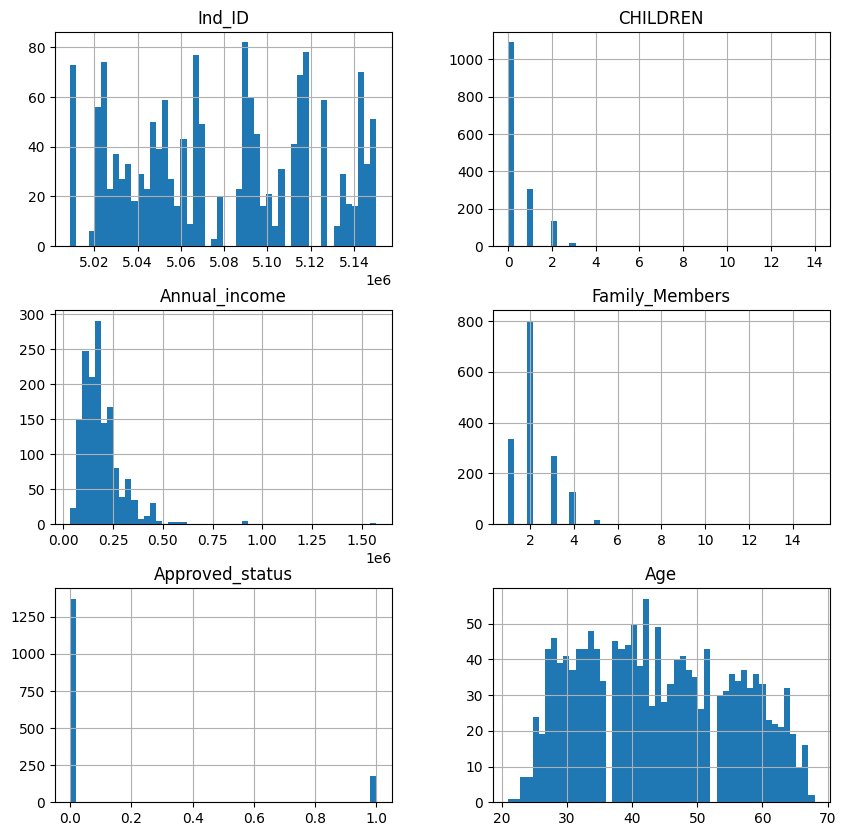

In [29]:
df.hist(bins=50,figsize=(10,10))
plt.show()

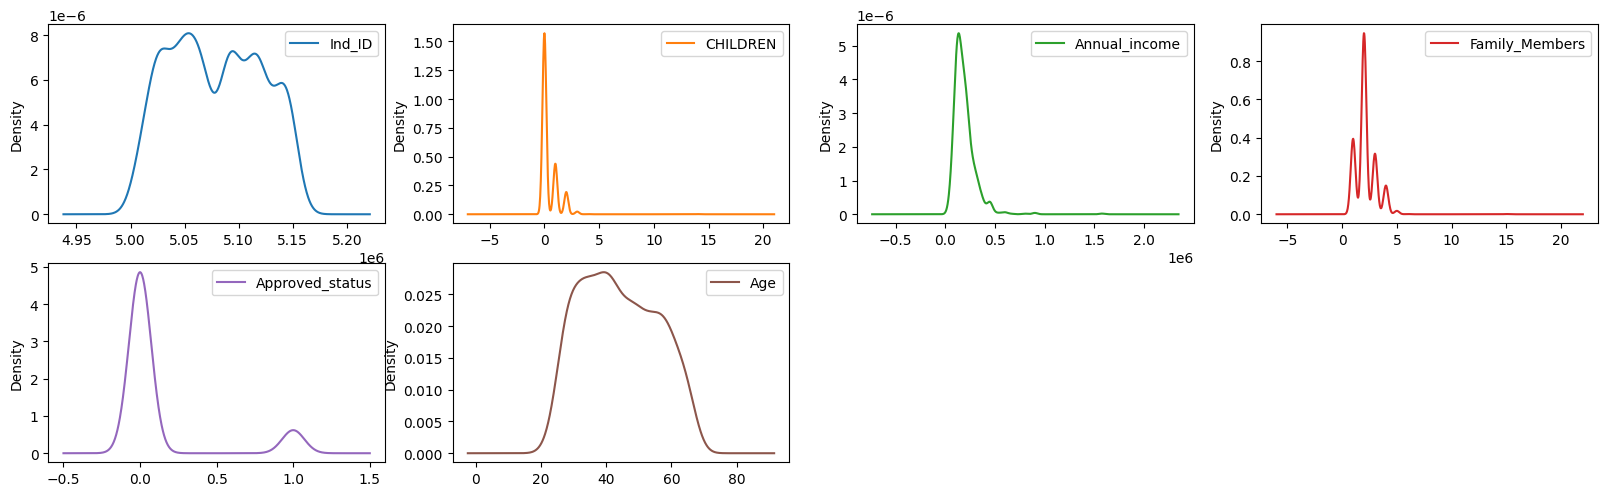

In [30]:
df.plot(kind='density', subplots=True, layout=(5, 4), sharex=False, figsize=(20, 15))
plt.show()


In [31]:
numerical_columns = df.select_dtypes(include='number')
for i in numerical_columns:
    print(i)

Ind_ID
CHILDREN
Annual_income
Family_Members
Approved_status
Age


## Exploring the Association Between the Target Variable and Numerical Features

In [33]:
# Assuming you have 'df' DataFrame and 'Approved_status' column

# List of numerical features
numerical_features = ['CHILDREN', 'Annual_income', 'Family_Members', 'Age']

# Create histograms for each numerical feature
for feature in numerical_features:
    fig = px.histogram(
        df,
        x=feature,
        color='Approved_status',
        nbins=20,  # Number of bins in the histogram
        title=f'{feature} Distribution by Approval Status',
        labels={feature: feature, 'count': 'Count'},
        opacity=0.7,  # Adjust opacity for better visibility of overlapping bars
        color_discrete_sequence=['green','purple'],  # Define colors for 'Approved' and 'Not Approved'
    )

    # Update layout for better readability
    fig.update_layout(
        xaxis_title=feature,
        yaxis_title='Count',
        legend_title='Approval Status',
        showlegend=True,
    )

    # Show the plot
    fig.show()

<h1 style="color:#336699;">Key Findings:</h1>

**-Customers with no children (0 Children) tend to have a higher likelihood of credit card approval application.**

**-Applicants with an annual income between 100,000 and 199,000  and ages between 25 and 60, are more likely to have their credit card applications approved.**

**-Households consisting of two family members have a notably higher probability of credit card application approval.**

When considering all these factors together (0 Children, Income 100k-199k, Age 25-60 and Family Size 2), individuals in this category exhibit a significantly higher likelihood of credit card application approval.


## Exploring the Association Between the Target Variable and Categorical Features

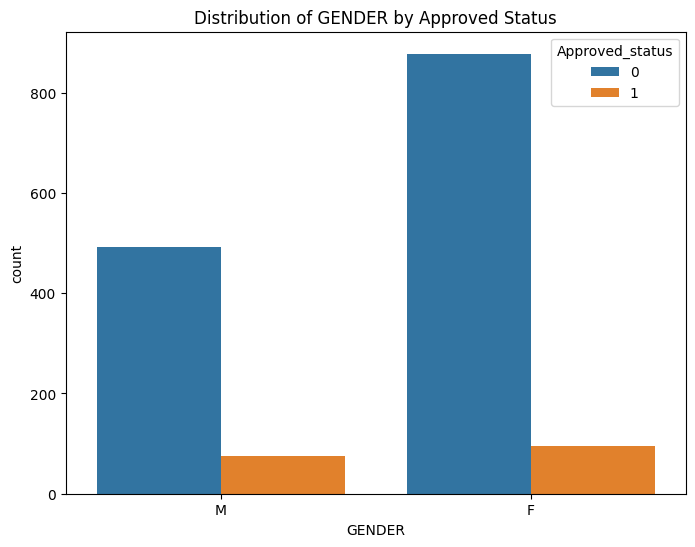

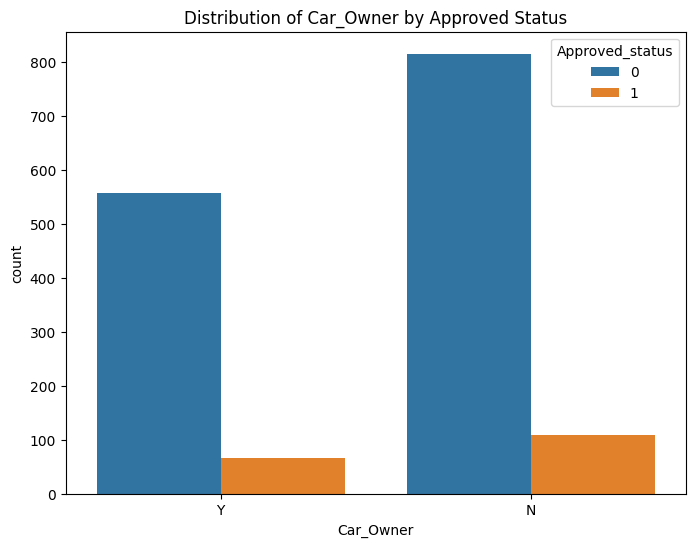

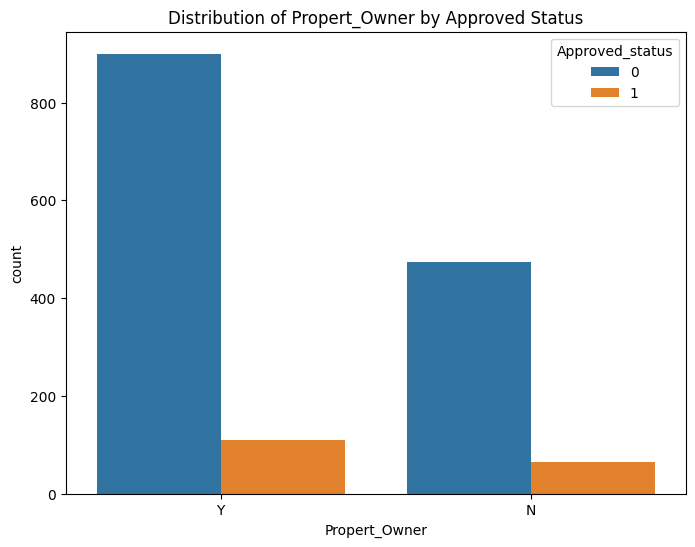

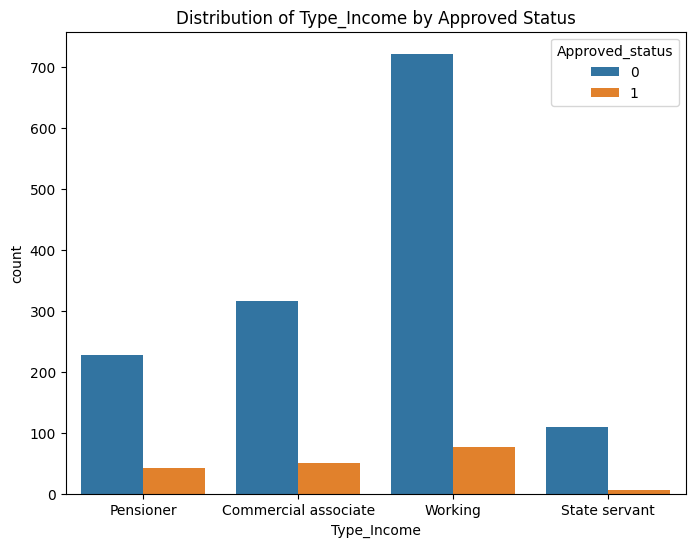

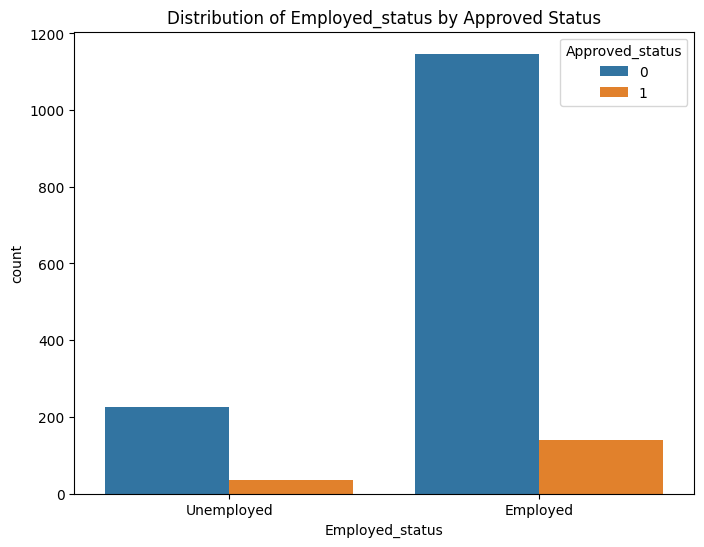

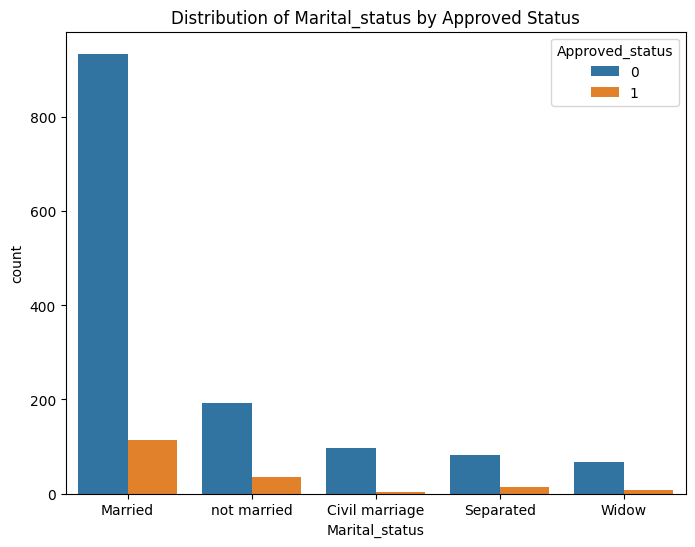

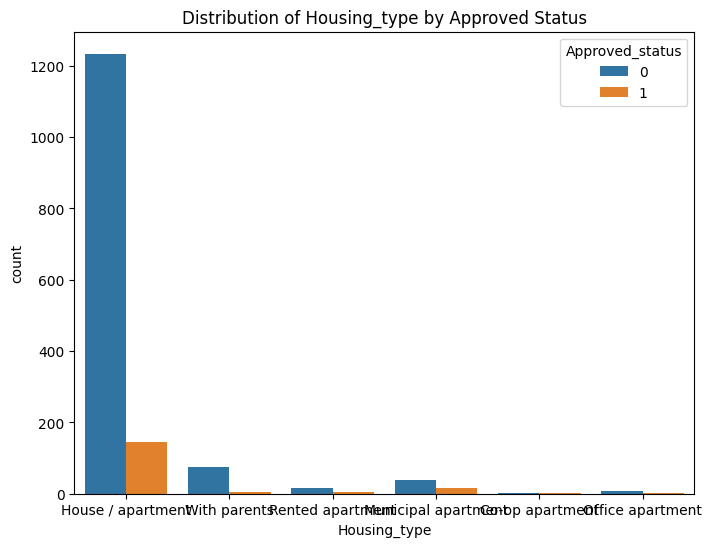

In [32]:
categorical_features = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income','Employed_status', 'Marital_status', 'Housing_type']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=feature, hue='Approved_status')
    plt.title(f'Distribution of {feature} by Approved Status')

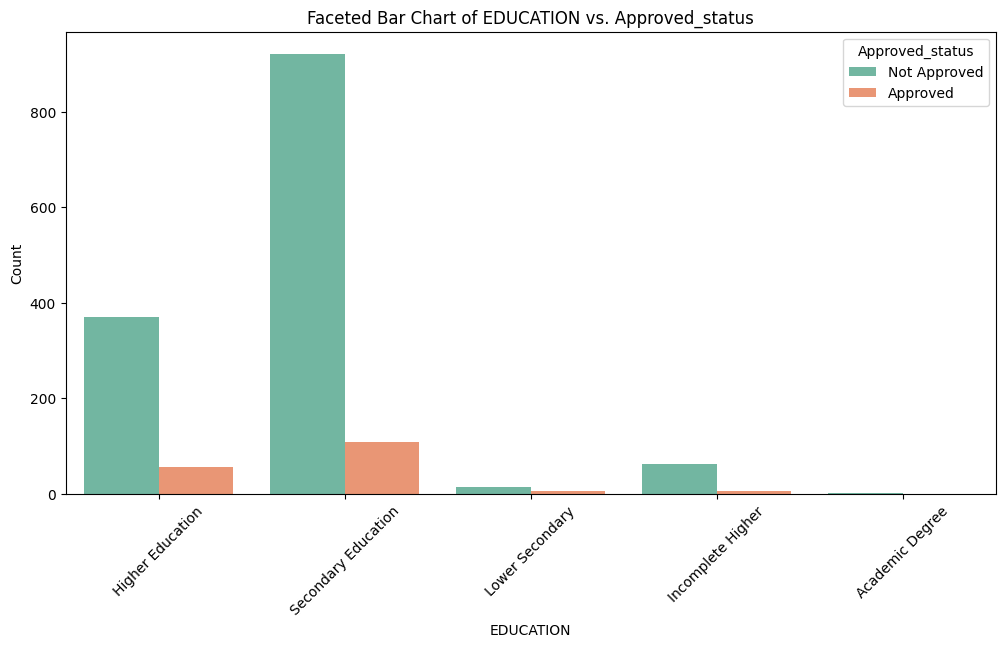

In [33]:
# Create a faceted bar chart for EDUCATION vs. Approved_status
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='EDUCATION', hue='Approved_status', palette='Set2')
plt.title('Faceted Bar Chart of EDUCATION vs. Approved_status')
plt.xlabel('EDUCATION')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Approved_status', labels=['Not Approved', 'Approved'])
plt.show()


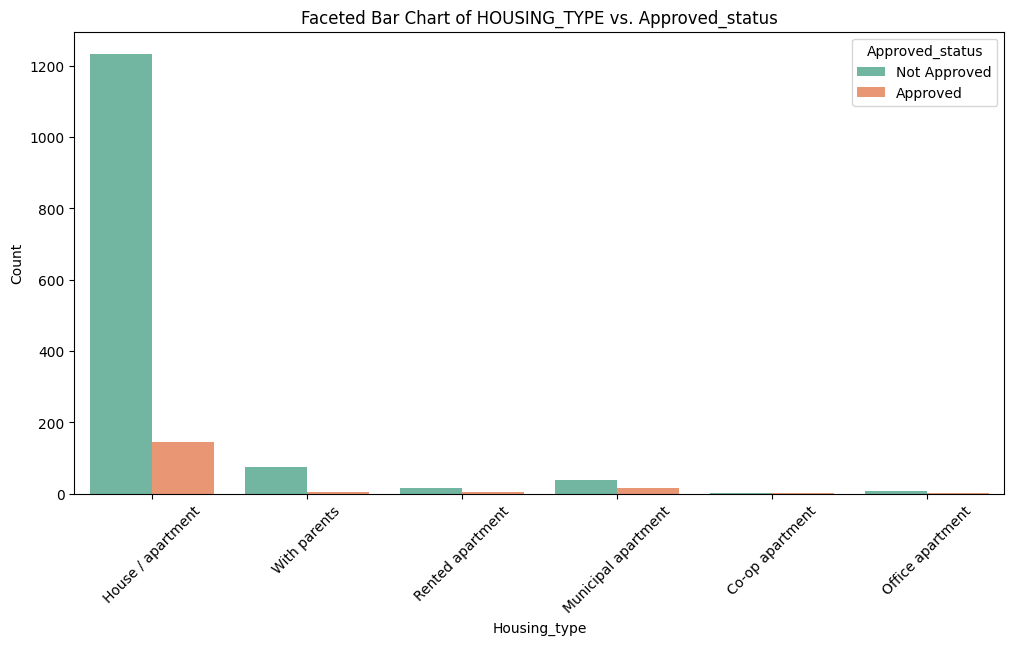

In [34]:
# Create a faceted bar chart for EDUCATION vs. Approved_status
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Housing_type', hue='Approved_status', palette='Set2')
plt.title('Faceted Bar Chart of HOUSING_TYPE vs. Approved_status')
plt.xlabel('Housing_type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Approved_status', labels=['Not Approved', 'Approved'])
plt.show()


<h1 style="color:#336699;">Key Findings:</h1>

<h3 style="color:#990033;">Income Type (Working)</h3>
<p>Customers with a 'working' income type tend to have a higher likelihood of their applications being approved compared to other income types.</p>

<h3 style="color:#009900;">Marital Status (Married)</h3>
<p>Married customers are more likely to have their applications approved in comparison to unmarried individuals.</p>

<h3 style="color:#663399;">Housing Type ('House/Apartment')</h3>
<p>Customers residing in 'house/apartment' type housing are more likely to see their applications approved when compared to those with different housing arrangements.</p>

<h3 style="color:#FF6600;">Combined Influence</h3>
<p>When considering all three factors together, individuals who are 'working,' married, and live in 'house/apartment' type housing exhibit a notably higher probability of having their loan applications approved.</p>


# Boxplot to Check Outliers in Dataset

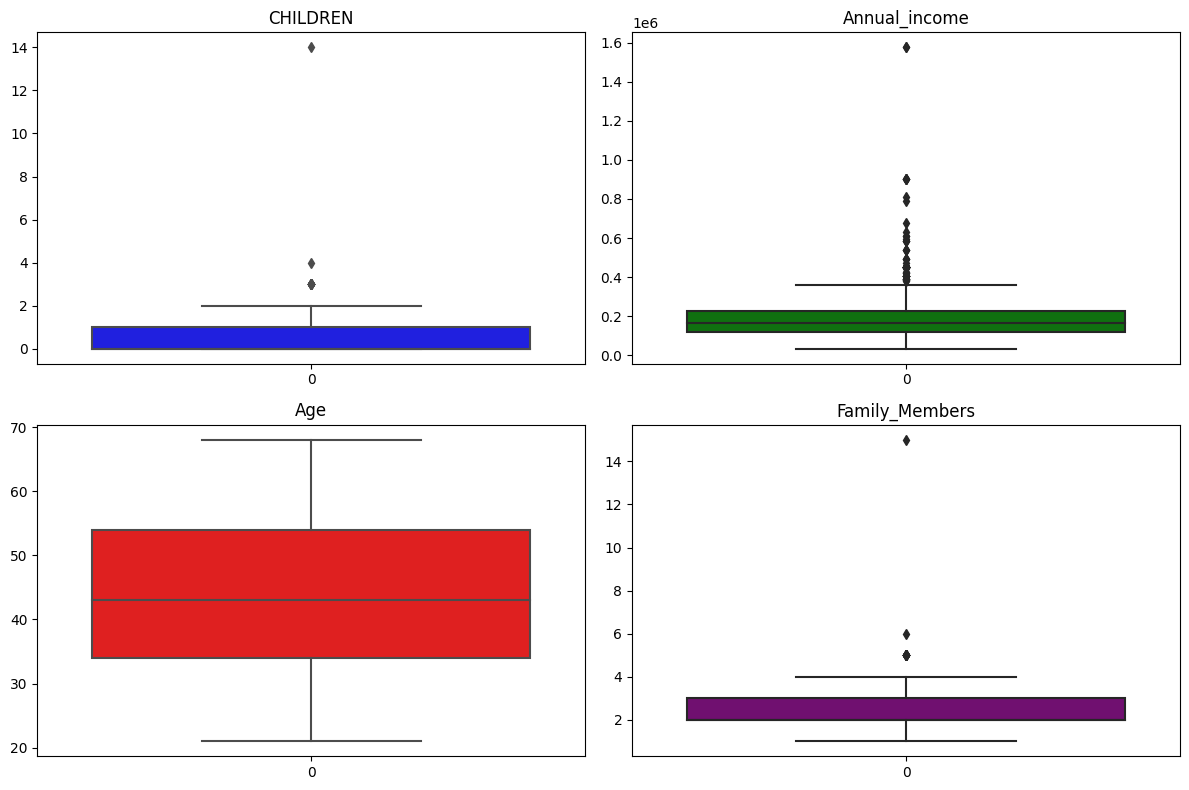

In [35]:
# Columns to create boxplots for
columns_to_plot = ['CHILDREN', 'Annual_income', 'Age', 'Family_Members']

# Create a list of different colors
colors = ['blue', 'green', 'red', 'purple']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Iterate through columns and create boxplots with different colors
for i, column in enumerate(columns_to_plot):
    sns.boxplot(data=df[column], ax=axes[i // 2, i % 2], palette=[colors[i]])
    axes[i // 2, i % 2].set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()


## So The dataset contains outliers in features like "Annual_income","CHILDREN" and "Family_Members"

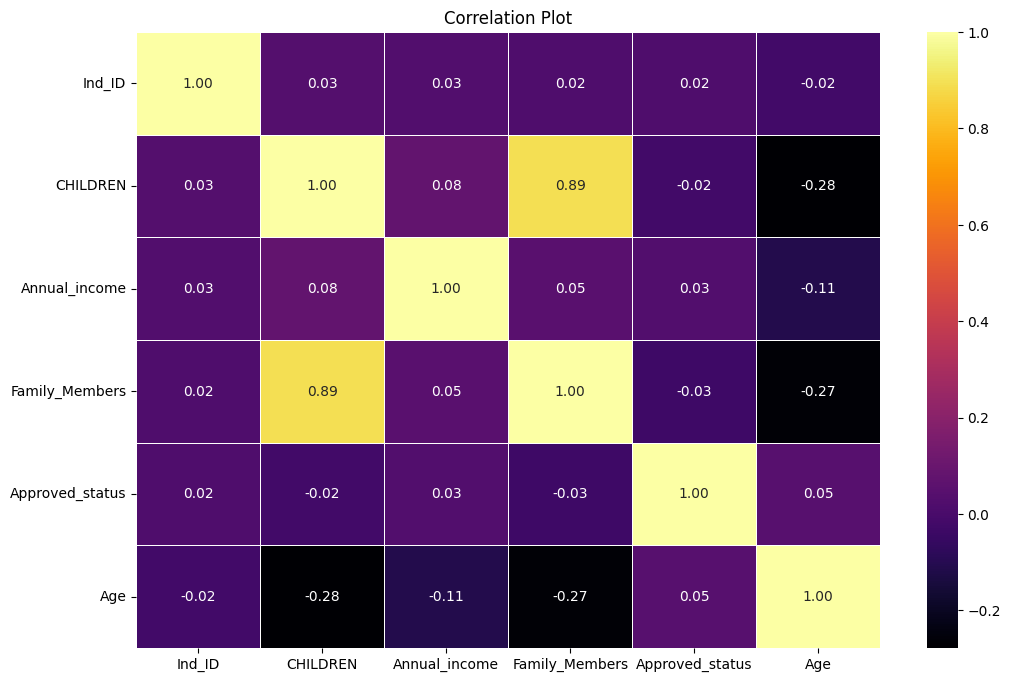

In [36]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='inferno', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot')
plt.show()


### <font  color=orange>**It has been shown that there is a strong correlation between family size and the number of children in a family**,</font>

### These observations highlight the need for data preprocessing, addressing missing values, handling outliers, and addressing class imbalance before building machine learning models.

# <font color=white>DATA PREPROCESSING</font>

## <font color=yellow>Feature Engineering:</font>

# <font color=limegreen>Handle Missing Values</font>

In [37]:
df.isnull().sum()

Ind_ID              0
GENDER              7
Car_Owner           0
Propert_Owner       0
CHILDREN            0
Annual_income      23
Type_Income         0
EDUCATION           0
Marital_status      0
Housing_type        0
Family_Members      0
Approved_status     0
Age                22
Employed_status     0
dtype: int64

## <font color=gold>**Fill Annual_income Column Missing Value**</font>

In [38]:
#Because Annual_income is an Continouns Variable with Outliers so fill missing values in this column with Median

df['Annual_income']=df['Annual_income'].fillna(df['Annual_income'].median())
df['Annual_income'].isnull().sum()

0

In [39]:
#Because Age is an Continouns Variable without Outliers so fill missing values in this column with Mode

df['Age'] = df['Age'].fillna(df['Age'].mode().iloc[0])

#df['Age'].mode() calculates the mode (most frequent) value in the "Age" column.
#.iloc[0] is used to access the first mode value in case there are multiple modes.


In [40]:
df['Age'].isnull().sum()

0

## **Rest Drop Null Values**

In [41]:
df = df.dropna()

In [42]:
df.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Family_Members     0
Approved_status    0
Age                0
Employed_status    0
dtype: int64

In [43]:
df.shape

(1541, 14)

# <font color=peru>Changing Datatype:</font>

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 1547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1541 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1541 non-null   object 
 3   Propert_Owner    1541 non-null   object 
 4   CHILDREN         1541 non-null   int64  
 5   Annual_income    1541 non-null   float64
 6   Type_Income      1541 non-null   object 
 7   EDUCATION        1541 non-null   object 
 8   Marital_status   1541 non-null   object 
 9   Housing_type     1541 non-null   object 
 10  Family_Members   1541 non-null   int64  
 11  Approved_status  1541 non-null   int64  
 12  Age              1541 non-null   float64
 13  Employed_status  1541 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 180.6+ KB


**Age not be float64 so change datatype of Age Feature into int32**

In [45]:
df['Age']=df['Age'].astype('int32')

In [46]:
df['Age'].dtype

dtype('int32')

# <font color=limegreen>**Handle Outlier in Dataset**</font>

### <font color=mediumslateblue>**We have identified outliers in the variables 'CHILDREN,' 'Annual_income,' and 'Family_Members' and need to address them appropriately.**</font>

### **Annual_income**

In [47]:
Q1 = df['Annual_income'].quantile(0.25)
Q3 = df['Annual_income'].quantile(0.75)

IQR = Q3-Q1

upper_l = Q3+(1.5*IQR)
lower_l = Q1-(1.5*IQR)

df['Annual_income'] = df['Annual_income'].clip(lower=lower_l,upper=upper_l)

### CHILDREN

In [48]:
Q1 = df['CHILDREN'].quantile(0.25)
Q3 = df['CHILDREN'].quantile(0.75)

IQR = Q3-Q1

upper_l = Q3+(1.5*IQR)
lower_l = Q1-(1.5*IQR)

df['CHILDREN'] = round(df['CHILDREN'].clip(lower=lower_l,upper=upper_l))

### Family_Members

In [49]:
Q1 = df['Family_Members'].quantile(0.25)
Q3 = df['Family_Members'].quantile(0.75)

IQR = Q3-Q1

upper_l = Q3+(1.5*IQR)
lower_l = Q1-(1.5*IQR)

df['Family_Members'] = round(df['Family_Members'].clip(lower=lower_l,upper=upper_l))

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 1547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1541 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1541 non-null   object 
 3   Propert_Owner    1541 non-null   object 
 4   CHILDREN         1541 non-null   float64
 5   Annual_income    1541 non-null   float64
 6   Type_Income      1541 non-null   object 
 7   EDUCATION        1541 non-null   object 
 8   Marital_status   1541 non-null   object 
 9   Housing_type     1541 non-null   object 
 10  Family_Members   1541 non-null   float64
 11  Approved_status  1541 non-null   int64  
 12  Age              1541 non-null   int32  
 13  Employed_status  1541 non-null   object 
dtypes: float64(3), int32(1), int64(2), object(8)
memory usage: 174.6+ KB


<font color=limegreen>**After handling outliers in <font color=black>'CHILDREN'</font> and <font color=black>'Family_Members'</font>, the datatype of these columns has changed to float. We also need to convert them back to int32.**</font>

In [51]:
df['CHILDREN'].dtype

dtype('float64')

In [52]:
df['CHILDREN']=df['CHILDREN'].astype('int32')

In [53]:
df['CHILDREN'].dtype

dtype('int32')

In [54]:
df['Family_Members'].dtype

dtype('float64')

In [55]:
df['Family_Members']=df['Family_Members'].astype('int32')
df['Family_Members'].dtype

dtype('int32')

### Now Check Outliers

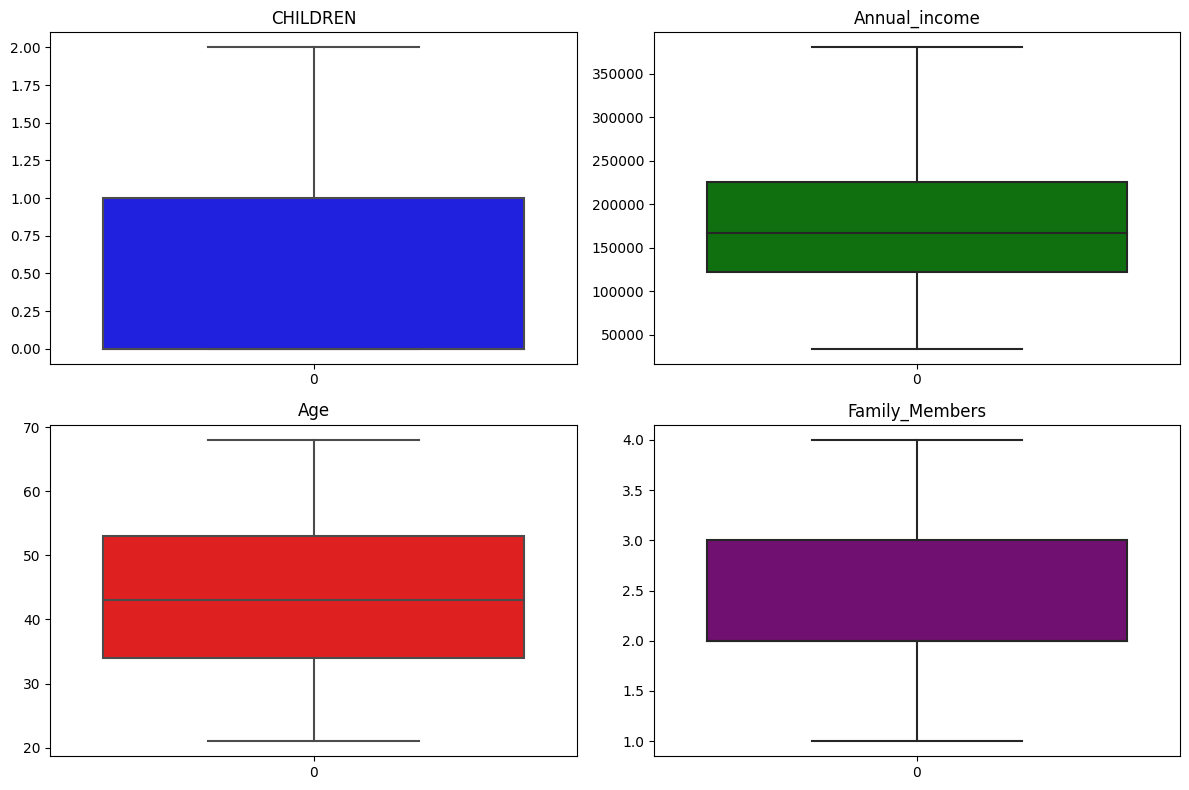

In [56]:
# Columns to create boxplots for
columns_to_plot = ['CHILDREN', 'Annual_income', 'Age', 'Family_Members']

# Create a list of different colors
colors = ['blue', 'green', 'red', 'purple']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Iterate through columns and create boxplots with different colors
for i, column in enumerate(columns_to_plot):
    sns.boxplot(data=df[column], ax=axes[i // 2, i % 2], palette=[colors[i]])
    axes[i // 2, i % 2].set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()

# SAVE OUR CLEAN DATA

In [57]:
from google.colab import files

# Assuming df is your DataFrame
df.to_excel("Credit_cards_cleaned.xlsx", index=False)

# Download the file
files.download("Credit_cards_cleaned.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
df = df.drop(columns=['Ind_ID'])

In [59]:
df.columns

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income',
       'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type',
       'Family_Members', 'Approved_status', 'Age', 'Employed_status'],
      dtype='object')

# <font color=magenta>Data Wrangling</font>

## <font color=turquoise>**Seprate Independent Variable(XX) and Dependent Variable(yy)**</font>

In [60]:
#Independent Variables
XX = df.drop('Approved_status',1)
XX.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Family_Members,Age,Employed_status
0,M,Y,Y,0,180000.0,Pensioner,Higher Education,Married,House / apartment,2,51,Unemployed
1,F,Y,N,0,315000.0,Commercial associate,Higher Education,Married,House / apartment,2,37,Employed
2,F,Y,N,0,315000.0,Commercial associate,Higher Education,Married,House / apartment,2,42,Employed
3,F,Y,N,0,166500.0,Commercial associate,Higher Education,Married,House / apartment,2,37,Employed
4,F,Y,N,0,315000.0,Commercial associate,Higher Education,Married,House / apartment,2,37,Employed


In [61]:
XX.shape

(1541, 12)

In [62]:
#Target variable

yy = df['Approved_status']
yy.head()

0    1
1    1
2    1
3    1
4    1
Name: Approved_status, dtype: int64

In [63]:
yy.value_counts()

0    1371
1     170
Name: Approved_status, dtype: int64

In [64]:
yy.shape

(1541,)

# <font color =yellow>Feature Encoding:</font>

In [65]:
categorical_column = []
for i in XX.columns:
    if XX[i].dtype=='object':
        categorical_column.append(i)

categorical_column

['GENDER',
 'Car_Owner',
 'Propert_Owner',
 'Type_Income',
 'EDUCATION',
 'Marital_status',
 'Housing_type',
 'Employed_status']

**Dummy encoding:**

In [66]:
XXX = pd.get_dummies(XX, columns=categorical_column, drop_first=True)

In [67]:
XXX.shape

(1541, 24)

## <font color=orange>Transformation:Convert the skewed data to normally distributed data.</font>

**We recognize that our target variable is heavily skewed or imbalanced**

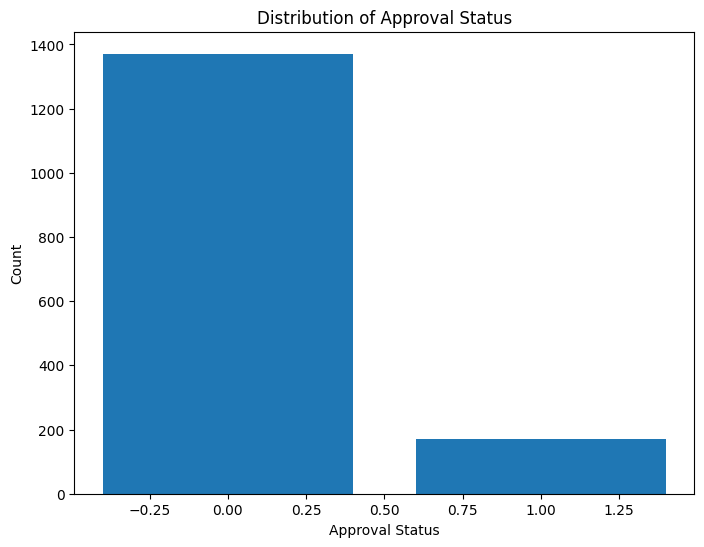

In [68]:
approval_counts = df['Approved_status'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))  # Set the figure size
plt.bar(approval_counts.index, approval_counts.values)

# Add labels and title
plt.xlabel('Approval Status')
plt.ylabel('Count')
plt.title('Distribution of Approval Status')

# Show the plot
plt.show()

## Handle Imbalance

In [69]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(XXX, yy)

In [70]:
y.shape

(2742,)

In [71]:
y.value_counts()

1    1371
0    1371
Name: Approved_status, dtype: int64

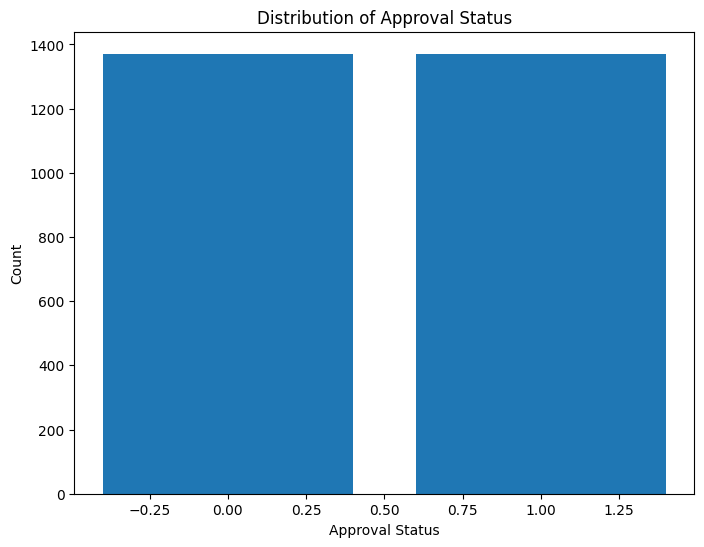

In [72]:
approval_counts = y.value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))  # Set the figure size
plt.bar(approval_counts.index, approval_counts.values)

# Add labels and title
plt.xlabel('Approval Status')
plt.ylabel('Count')
plt.title('Distribution of Approval Status')

# Show the plot
plt.show()


# <font color=yellow>Split the data into training and testing sets</font>

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [74]:
print(len(X_train))
print(len(X_test))

2193
549


# Feature Scaling

In [75]:
X_train.head(10)

,CHILDREN,Annual_income,Family_Members,Age,GENDER_M,Car_Owner_Y,Propert_Owner_Y,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,...,Marital_status_Married,Marital_status_Separated,Marital_status_Widow,Marital_status_not married,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,Employed_status_Unemployed
2273,0,180000.0,1,45,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1435,2,202500.0,4,36,1,1,1,0,0,1,...,1,0,0,0,1,0,0,0,0,0
2229,0,202500.0,2,40,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1609,0,225000.0,2,51,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
1860,0,225000.0,2,49,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
1290,0,157500.0,1,67,0,0,1,1,0,0,...,0,0,1,0,1,0,0,0,0,1
247,2,360000.0,4,44,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2249,0,135000.0,1,55,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2535,0,315000.0,2,45,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
347,1,135000.0,3,29,0,1,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0


In [76]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
X_train

array([[-0.5372779 , -0.07308928, -1.30282154, ..., -0.09593678,
        -0.18424509, -0.42087249],
       [ 2.94352101,  0.18865105,  2.52363513, ..., -0.09593678,
        -0.18424509, -0.42087249],
       [-0.5372779 ,  0.18865105, -0.02733599, ..., -0.09593678,
        -0.18424509, -0.42087249],
       ...,
       [-0.5372779 , -0.59656994, -0.02733599, ..., -0.09593678,
        -0.18424509, -0.42087249],
       [-0.5372779 , -1.17239866, -1.30282154, ..., -0.09593678,
        -0.18424509, -0.42087249],
       [ 2.94352101, -0.33482961,  2.52363513, ..., -0.09593678,
        -0.18424509, -0.42087249]])

# <font color=orange>Modelling</font>

## Import Libraries for Modelling

In [78]:
#Logistic Regression:
from sklearn.linear_model import LogisticRegression
#Support Vector Machine:
from sklearn.svm import SVC
#Decision Tree:
from sklearn.tree import DecisionTreeClassifier
#Random Forest:
from sklearn.ensemble import RandomForestClassifier
#XG_Boost:
from xgboost import XGBClassifier


#Hyperparameter Tunning
from sklearn.model_selection import GridSearchCV

#Evaluation:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix


# <font color=lime green>Logistic Regression:</font>

In [79]:
logistic = LogisticRegression(C=100,penalty='l1',solver='liblinear',random_state=16)
logistic.fit(X_train,y_train)

LogisticRegression(C=100, penalty='l1', random_state=16, solver='liblinear')

In [80]:
#Prediction on Traing Data
log_pred_train = logistic.predict(X_train)
#Prediction on Test Data
log_pred_test = logistic.predict(X_test)

In [81]:
log_Train_Accuracy = accuracy_score(y_train,log_pred_train)*100
log_Test_Accuracy = accuracy_score(y_test,log_pred_test)*100
Log_CV = cross_val_score(logistic,X_test,y_test,cv=5,scoring="accuracy").mean()*100


print(f"Train Accuracy: {log_Train_Accuracy:.2f}%")
print(f"Test Accuracy: {log_Test_Accuracy:.2f}%")
print(f"cross Validataion Score: {Log_CV:.2f}%")

Train Accuracy: 80.44%
Test Accuracy: 83.24%
cross Validataion Score: 79.24%


In [82]:
class_report_lr = classification_report(y_test,log_pred_test)
print(class_report_lr)

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       283
           1       0.91      0.73      0.81       266

    accuracy                           0.83       549
   macro avg       0.85      0.83      0.83       549
weighted avg       0.84      0.83      0.83       549



### Hyperparameter Tunning

In [83]:
# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
# Create a Logistic Regression model
logistic = LogisticRegression(random_state=16)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=logistic, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best parameters: ", best_params)

Best parameters:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


# <font color=lime green>Support Vector Machine:</font>

In [84]:
sv_model = SVC(C=100, gamma=1,kernel='rbf',random_state=15)
sv_model.fit(X_train,y_train)


SVC(C=100, gamma=1, random_state=15)

In [85]:
#Prediction on Traing Data
sv_pred_train = sv_model.predict(X_train)
#Prediction on Test Data
sv_pred_test = sv_model.predict(X_test)

In [86]:
#Evaluation
SVM_Train_Accuracy = accuracy_score(y_train,sv_pred_train)*100
SVM_Test_Accuracy = accuracy_score(y_test,sv_pred_test)*100
SVM_CV = cross_val_score(sv_model,X_test,y_test,cv=5,scoring="accuracy").mean()*100


print(f"Train Accuracy: {SVM_Train_Accuracy:.2f}%")
print(f"Test Accuracy: {SVM_Test_Accuracy:.2f}%")
print(f"cross Validataion Score: {SVM_CV:.2f}%")

Train Accuracy: 98.81%
Test Accuracy: 91.07%
cross Validataion Score: 80.50%


In [87]:
class_report_lr = classification_report(y_test,sv_pred_test)
print(class_report_lr)

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       283
           1       0.92      0.90      0.91       266

    accuracy                           0.91       549
   macro avg       0.91      0.91      0.91       549
weighted avg       0.91      0.91      0.91       549



## Hyperparameter Tunning

In [88]:
sv_model = SVC(random_state=15)

param_grid = {'C': [0.1, 1, 10, 100],'gamma': [1, 0.1, 0.01, 0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

grid_search = GridSearchCV(estimator=sv_model, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Best parameters: ", best_params)


Best parameters:  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


# <font color=lime green>DECISION TREE:</font>

In [89]:
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=25,random_state = 6)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=25, random_state=6)

In [90]:
#Prediction on Traing Data
dt_pred_train = dt_model.predict(X_train)
#Prediction on Test Data
dt_pred_test = dt_model.predict(X_test)

In [91]:
#Evaluation
DT_Train_Accuracy = accuracy_score(y_train,dt_pred_train)*100
DT_Test_Accuracy = accuracy_score(y_test,dt_pred_test)*100
DT_CV = cross_val_score(dt_model,X_test,y_test,cv=5,scoring="accuracy").mean()*100


print(f"Train Accuracy: {DT_Train_Accuracy:.2f}%")
print(f"Test Accuracy: {DT_Test_Accuracy:.2f}%")
print(f"cross Validataion Score: {DT_CV:.2f}%")

Train Accuracy: 99.41%
Test Accuracy: 93.26%
cross Validataion Score: 84.52%


In [92]:
class_report_lr = classification_report(y_test,dt_pred_test)
print(class_report_lr)

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       283
           1       0.91      0.96      0.93       266

    accuracy                           0.93       549
   macro avg       0.93      0.93      0.93       549
weighted avg       0.93      0.93      0.93       549



## Hyperparameter Tunning

In [93]:
estimator = DecisionTreeClassifier(random_state=6)

param_grid = {"criterion":["gini","entropy"], "max_depth":list(range(1,16))}

grid = GridSearchCV(estimator, param_grid,cv=5)

grid.fit(X_train,y_train)

best_params=grid.best_params_
print("Best parameters: ", best_params)

Best parameters:  {'criterion': 'gini', 'max_depth': 15}


# <font color=lime green>RANDOM FOREST:</font>

In [94]:
rf_model = RandomForestClassifier(bootstrap= False,max_depth=None, min_samples_leaf=1,min_samples_split=5,n_estimators=300,random_state=25)
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, min_samples_split=5, n_estimators=300,
                       random_state=25)

In [95]:
#Prediction on Traing Data
rf_pred_train = rf_model.predict(X_train)
#Prediction on Test Data
rf_pred_test = rf_model.predict(X_test)

In [96]:
#Evaluation
RF_Train_Accuracy = accuracy_score(y_train,rf_pred_train)*100
RF_Test_Accuracy = accuracy_score(y_test,rf_pred_test)*100
RF_CV = cross_val_score(rf_model,X_test,y_test,cv=5,scoring="accuracy").mean()*100


print(f"Train Accuracy: {RF_Train_Accuracy:.2f}%")
print(f"Test Accuracy: {RF_Test_Accuracy:.2f}%")
print(f"cross Validataion Score: {RF_CV:.2f}%")

Train Accuracy: 99.32%
Test Accuracy: 95.99%
cross Validataion Score: 86.70%


In [97]:
class_report_lr = classification_report(y_test,rf_pred_test)
print(class_report_lr)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       283
           1       0.97      0.95      0.96       266

    accuracy                           0.96       549
   macro avg       0.96      0.96      0.96       549
weighted avg       0.96      0.96      0.96       549



## Hyperparameter Tunning

In [98]:
rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Best parameters: ", best_params)


Best parameters:  {'bootstrap': False, 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


# <font color=lime green>XGBOOST:</font>

In [99]:
xg_model = XGBClassifier(colsample_bytree=0.5,learning_rate=0.1,max_depth=30,n_estimators=100,subsample=1.0,random_state=2)
xg_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=2, ...)

In [100]:
#Prediction on Traing Data
xg_pred_train = xg_model.predict(X_train)
#Prediction on Test Data
xg_pred_test = xg_model.predict(X_test)

In [101]:
#Evaluation
XG_Train_Accuracy = accuracy_score(y_train,xg_pred_train)*100
XG_Test_Accuracy = accuracy_score(y_test,xg_pred_test)*100
XG_CV = cross_val_score(xg_model,X_test,y_test,cv=5,scoring="accuracy").mean()*100


print(f"Train Accuracy: {XG_Train_Accuracy:.2f}%")
print(f"Test Accuracy: {XG_Test_Accuracy:.2f}%")
print(f"cross Validataion Score: {XG_CV:.2f}%")

Train Accuracy: 98.95%
Test Accuracy: 96.72%
cross Validataion Score: 89.07%


In [102]:
class_report_lr = classification_report(y_test,xg_pred_test)
print(class_report_lr)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       283
           1       0.97      0.97      0.97       266

    accuracy                           0.97       549
   macro avg       0.97      0.97      0.97       549
weighted avg       0.97      0.97      0.97       549



## Hyperparameter Tunning

In [103]:
xg_model = XGBClassifier()

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
}

grid_search = GridSearchCV(estimator=xg_model, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Best parameters: ", best_params)

Best parameters:  {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 100, 'subsample': 1.0}


# <font color=yellow>Model Selection:</font>

In [104]:
final_data = pd.DataFrame({"Models":['Logistic','SVM','DCTREE','RNDMF','XGBOOST',],
                          "TRAIN_ACC_SCORE":[log_Train_Accuracy,
                                       SVM_Train_Accuracy,
                                       DT_Train_Accuracy,
                                       RF_Train_Accuracy,
                                       XG_Train_Accuracy,
                                      ],
                           "TEST_ACC_SCORE":[log_Test_Accuracy,
                                            SVM_Test_Accuracy,
                                            DT_Test_Accuracy,
                                            RF_Test_Accuracy,
                                            XG_Test_Accuracy],
                         "CV_SCORE":[Log_CV,
                                     SVM_CV,
                                     DT_CV,
                                     RF_CV,
                                    XG_CV]})

In [105]:
final_data

,Models,TRAIN_ACC_SCORE,TEST_ACC_SCORE,CV_SCORE
0,Logistic,80.437756,83.242259,79.241034
1,SVM,98.814409,91.074681,80.503753
2,DCTREE,99.407205,93.260474,84.517098
3,RNDMF,99.316005,95.992714,86.700584
4,XGBOOST,98.951208,96.721311,89.074229


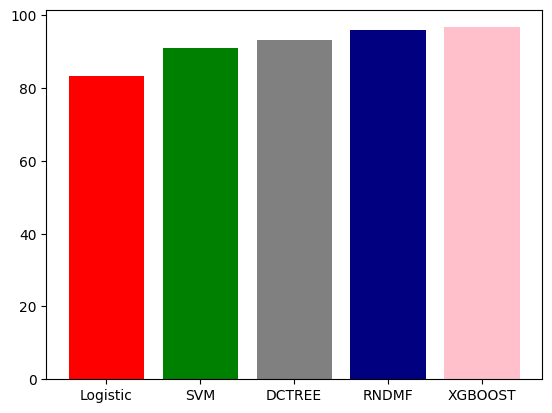

In [106]:
#graphical view
x = final_data['Models']
y= final_data['TEST_ACC_SCORE']
clr = ['red', 'green', 'grey', 'navy','pink']  # Corrected color list

plt.bar(x, y, color=clr)
plt.show()

In [107]:
df1 = pd.DataFrame({"Actual":y_test,
                   "LOG_PRED":log_pred_test,
                   "SVM_PRED":sv_pred_test,
                    "DT_PRED": dt_pred_test,
                   "RF_PRED":rf_pred_test,
                   "XG_PRED":xg_pred_test})

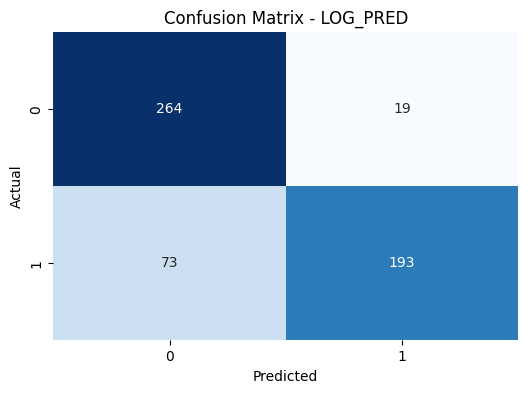

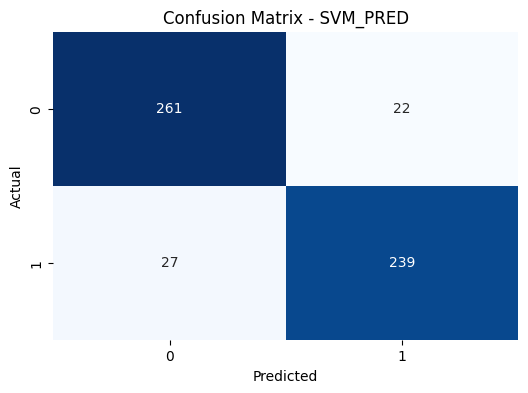

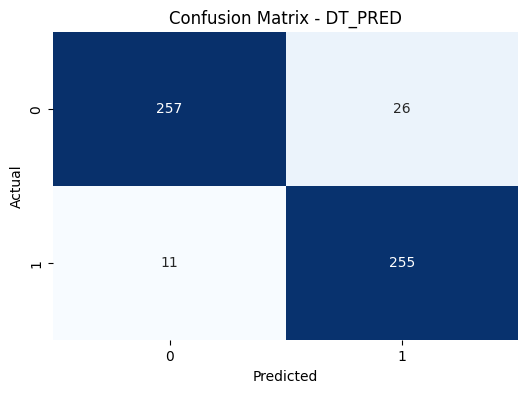

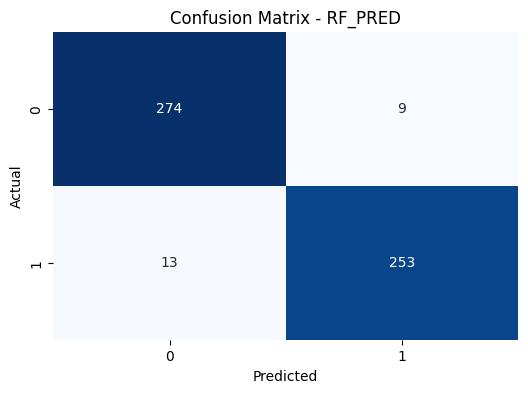

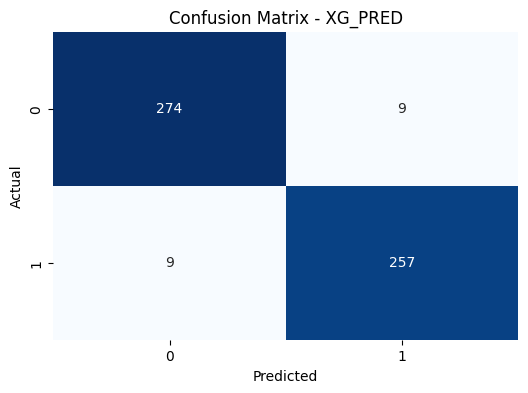

In [108]:
actual_labels = y_test  # Actual labels

# Sample predictions for each model
model_predictions = {"LOG_PRED":log_pred_test,
                   "SVM_PRED":sv_pred_test,
                    "DT_PRED": dt_pred_test,
                   "RF_PRED":rf_pred_test,
                   "XG_PRED":xg_pred_test}
# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")

# Calculate and plot confusion matrices for each model
for model_name, predictions in model_predictions.items():
    cm = confusion_matrix(actual_labels, predictions)
    plot_confusion_matrix(cm, model_name)

plt.show()

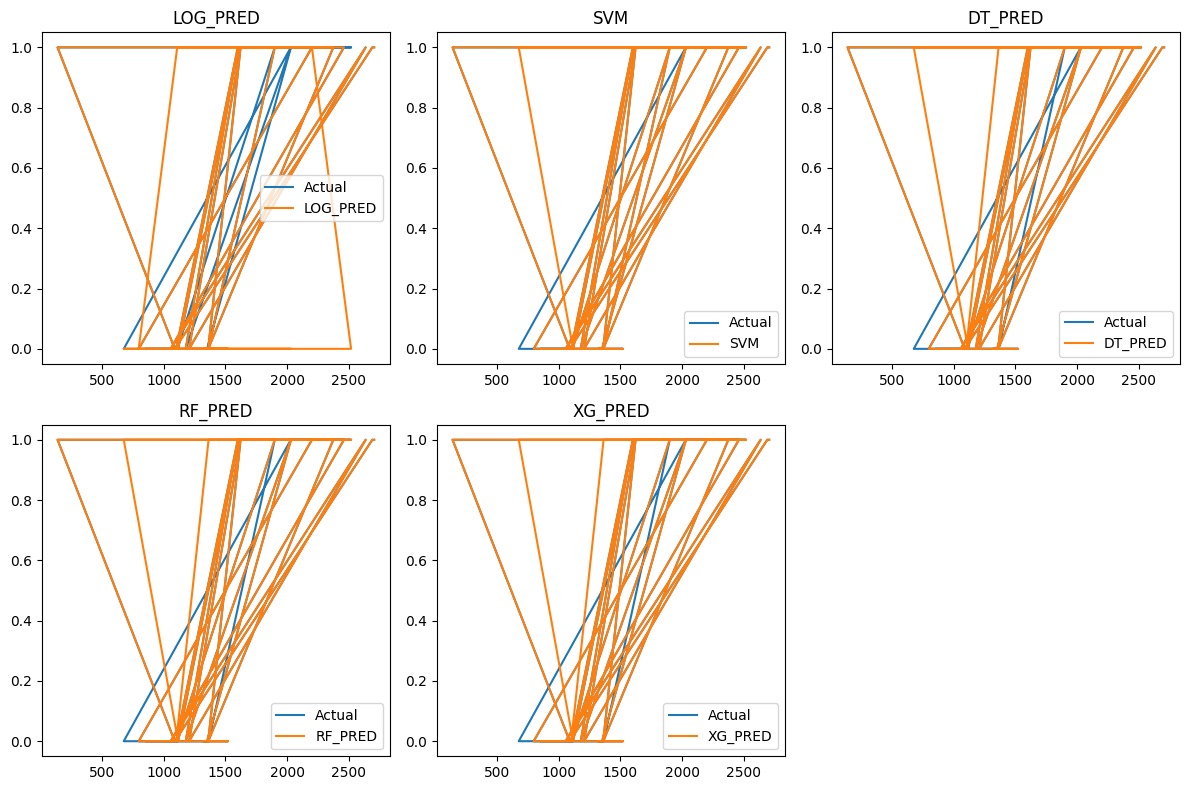

In [109]:
# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(12, 8))


# Plot for LR
axes[0, 0].plot(df1['Actual'].iloc[0:31], label='Actual')
axes[0, 0].plot(df1['LOG_PRED'].iloc[0:31], label="LOG_PRED")
axes[0, 0].set_title('LOG_PRED')
axes[0, 0].legend()

# Plot for SVM
axes[0, 1].plot(df1['Actual'].iloc[0:31], label='Actual')
axes[0, 1].plot(df1['SVM_PRED'].iloc[0:31], label="SVM")
axes[0, 1].set_title('SVM')
axes[0, 1].legend()

# Plot for DCT
axes[0, 2].plot(df1['Actual'].iloc[0:31], label='Actual')
axes[0, 2].plot(df1['DT_PRED'].iloc[0:31], label="DT_PRED")
axes[0, 2].set_title('DT_PRED')
axes[0, 2].legend()

# Plot for RF
axes[1, 0].plot(df1['Actual'].iloc[0:31], label='Actual')
axes[1, 0].plot(df1['RF_PRED'].iloc[0:31], label="RF_PRED")
axes[1, 0].set_title('RF_PRED')
axes[1, 0].legend()

# Plot for XG
axes[1, 1].plot(df1['Actual'].iloc[0:31], label='Actual')
axes[1, 1].plot(df1['XG_PRED'].iloc[0:31], label="XG_PRED")
axes[1, 1].set_title('XG_PRED')
axes[1, 1].legend()

# Remove the empty subplot
fig.delaxes(axes[1, 2])

# Add legends once at the end
plt.tight_layout()
plt.show()

# <font color="red">Conclusion</font>

Based on the performance metrics of the five models (Logistic Regression, Support Vector Machine, Decision Tree, Random Forest, and XG Boost) and considering the goal of maximizing the accuracy of credit card approval prediction, the **XG Boost Model** emerges as the most suitable choice:

### <font color="blue">Accuracy Score</font>
- The XG Boost model achieved the highest accuracy score among the models, with a value of **96.72%**. This indicates that XG Boost has learned well from the training data and exhibits excellent generalization performance, making it the top-performing model among those considered.

### <font color="green">Precision Score</font>
- For predicting approved cases (0), the XG Boost model achieved a precision score of **0.97**, signifying that when it predicted an approval, it was highly reliable. For predicting non-approved cases (1), it achieved a precision score of **0.97**, indicating a high level of accuracy.

### <font color="purple">Recall Score</font>
- The XG Boost model demonstrated excellent recall for approved cases (0) with a score of **0.97**, implying that it effectively captured nearly all actual credit card approvals. While its recall for non-approved cases (1) was slightly lower at **0.97**.

### <font color="orange">F1 Score</font>
- The F1 Score, which combines precision and recall, was high for predicting approved cases (0), with a value of **0.97**, indicating a good balance between precision and recall. For non-approved cases (1), the F1 Score was also **0.97**, reflecting a trade-off between precision and recall, as expected.

In conclusion, the **XG Boost model** demonstrates the best overall performance in terms of accuracy and precision while maintaining a reasonable balance between precision and recall for both approval and non-approval predictions. Therefore, it is the recommended choice for credit card approval prediction based on the provided data and evaluation metrics.
